## plot_class_taxonomy_counts.ipynb

Description: Compute plant taxonomy class count plots for the newly released Leavesdb-v1.1 (official version on figshare is labeled v1.0). To be used as diagrams in our imminent GAN paper, Spring 2022.

Created On: Saturday Jan 29th, 2022  
Created By: Jacob A Rose

### Data Science Questions
What do we want to know about our data, and how will visualizing it help to clarify?

1. How are our images distributed within and between classes?
    a. Family counts: What is the count of total # of images in each Family? 
        i. Is it mostly uniform or imbalanced?
        ii. If imbalanced, is it a a short or long-tailed distribution?
    b. Per-Family Genus/Species counts: What are the distributions of image counts per Genus/Species, grouped by Family? 
        i. What is the relationship between the # of images in a Family, and the count of its constituent Genera/Species (i.e. the total # of **images** in each Genus/Species of a particular Family, vs. just the # of distinct **types** of Genus/Species(sub-classes))
        
2. How can we determine an appropriate threshold on the minimum per-class image counts for valid Families, without incidentally removing more data than necessary?  
    a. Plot thresholds vs. Total Family count (or Family %)  
    b. Plot thresholds vs. Total image count (or image %)

size: (960, 960)
size: (960, 960)
size: (960, 960)
size: (960, 960)
size: (960, 960)
size: (960, 960)
size: (960, 960)
size: (960, 960)


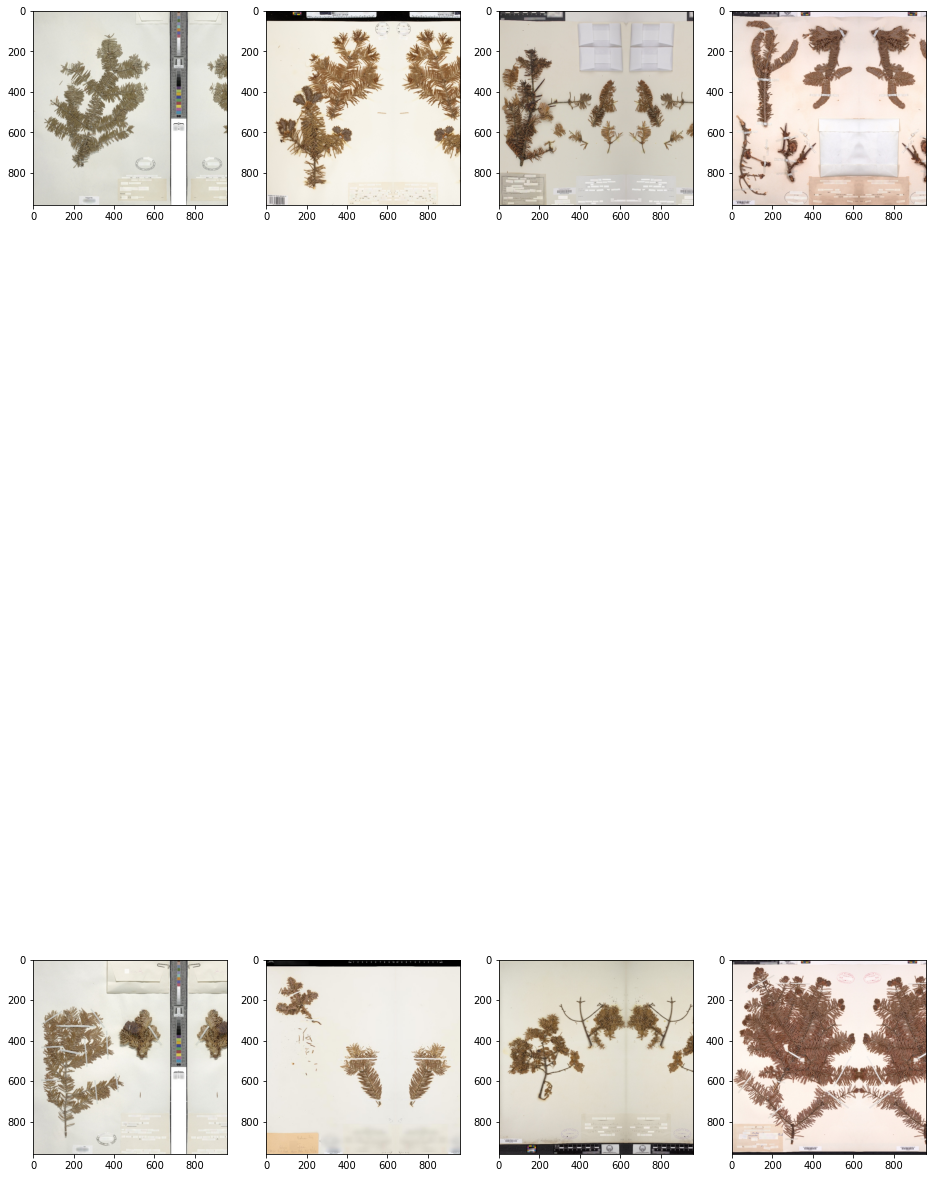

In [8]:
import matplotlib.pyplot as plt
import PIL.Image
import os


root_path = "/media/data_cifs/projects/prj_fossils/data/raw_data/herbarium-2022-fgvc9_resize/train_images/000/01/"

paths = [os.path.join(root_path, p) for p in os.listdir(root_path)]

fig, axs = plt.subplots(2,4,figsize=(16,32))
axs = axs.flatten()
for i in range(8):
    img = PIL.Image.open(paths[i])
    print(f"size: {img.size}")
    axs[i].imshow(img)

In [13]:
import numpy as np

img_array = np.array(img)
print(img_array.shape)

(960, 960, 3)


<BarContainer object of 768 artists>

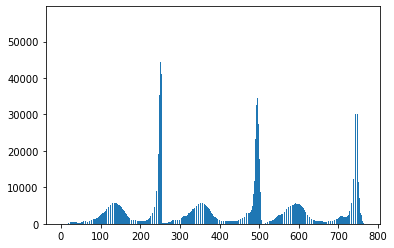

In [12]:
img_hist = img.histogram()
hist_idx = list(range(len(img_hist)))
plt.bar(hist_idx, img_hist)

In [7]:
img.size

(960, 960)

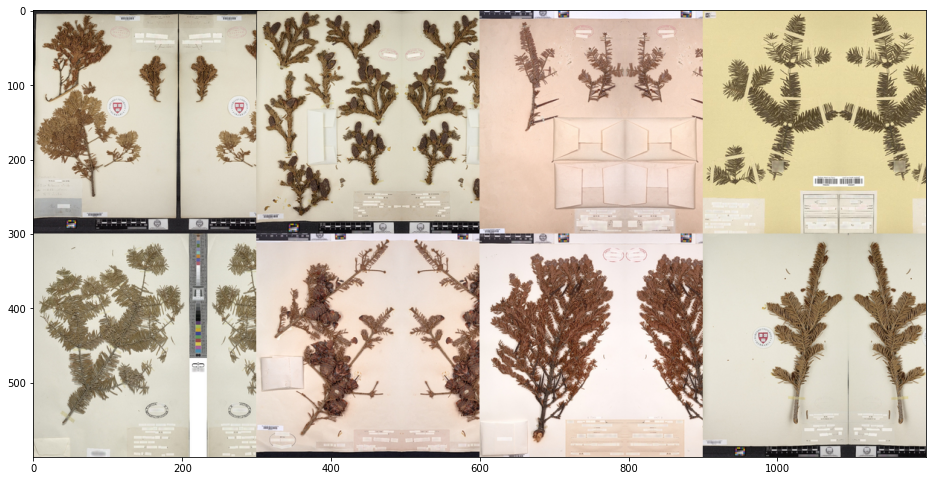

In [6]:
import random
from PIL import Image, ImageOps


def concat_images(image_paths, size, shape=None):
    # Open images and resize them
    width, height = size
    images = map(Image.open, image_paths)
    images = [ImageOps.fit(image, size, Image.ANTIALIAS) 
              for image in images]
    
    # Create canvas for the final image with total size
    shape = shape if shape else (1, len(images))
    image_size = (width * shape[1], height * shape[0])
    image = Image.new('RGB', image_size)
    
    # Paste images into final image
    for row in range(shape[0]):
        for col in range(shape[1]):
            offset = width * col, height * row
            idx = row * shape[1] + col
            image.paste(images[idx], offset)
    
    return image

# Get list of image paths
# folder = 'images'
# image_paths = [os.path.join(folder, f) 
#                for f in os.listdir(folder) if f.endswith('.jpg')]

# Random selection of images
image_array = random.choices(paths, k=8)

# Create and save image grid
image = concat_images(image_array, (300, 300), (2, 4))
image.save('image.jpg', 'JPEG')

plt.figure(figsize=(16,30))
plt.imshow(image)

### Key constants

In [1]:
DATASETS_ROOT = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images"

EXTANT_ROOT = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Extant_Leaves/original/full/jpg"

GENERAL_ROOT = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Fossil/General_Fossil/original/full/jpg"

FLORISSANT_ROOT = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Fossil/Florissant_Fossil/original/full/jpg"


OUTPUTS_DIR = "/media/data/jacob/GitHub/image-utils/notebooks/plots"

### Code Definitions

In [2]:
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path

# from imutils.utils.etl_utils import Extract

from imutils.utils.dataset_management_utils import Extract


Importing imutils
ASSETS_DIR: /media/data/jacob/GitHub/image-utils/assets
SAMPLE_IMAGE_PATHS: [PosixPath('/media/data/jacob/GitHub/image-utils/assets/Ericaceae_Zenobia_pulverulenta_7984 {WolfeUSGS} [1.96x].jpg'), PosixPath('/media/data/jacob/GitHub/image-utils/assets/Ericaceae_Arbutus_densiflora_1440 {WolfeUSGS} [1.96x].jpg')]


In [3]:
from datetime import datetime

st = datetime.now()
et = datetime.now() - st

print("Start:", str(st))#.strftime('%Y-%m-%d %H:%M:%S'))

Start: 2022-02-07 09:09:39.582864


In [4]:
print("End (barplot):", 
      f"Barplot only: {str(et)}",
      f"Total: {str(et)}")

End (barplot): Barplot only: 0:00:00.000057 Total: 0:00:00.000057


In [5]:
("viridis")

'viridis'

In [54]:
import numpy as np

def plot_class_counts(df,
                      y_col="Family",
                      ax=None,
                      figsize=(25,10),
                      alpha: int=0.8,
                      hue: str=None,
                      ticklabel_rotation: int=40,
                      title: str=None,
                      line_color="black",
                      cmap="copper",
                      xticks=None,
                      xtick_labels=None,
                      log_yaxis: bool=False,
                      lineplot_kwargs=None,
                      **barplot_kwargs):
    
    st = datetime.now()
    print("Start:", str(st))
    
    if ax is None:
        fig, ax = plt.subplots(1,1, figsize=figsize)
    else:
        fig = plt.gcf()
    # plt.rc('xtick', labelsize=3)
    if "normalized_cumsum" in df.columns:
        
        norm = plt.Normalize(df["count"].values.min(), df["count"].values.max())
        colors = plt.cm.get_cmap(cmap)(norm(df["count"]))
        barplot_kwargs.update({"color":colors})
        
        x = list(range(df.shape[0]))
        height = df["count"]
        if xtick_labels is None:
            xtick_labels = df[y_col].values

        # sns.barplot(x="Family", y="count", data=df, hue=hue, alpha=alpha, ax=ax, ci=None, **barplot_kwargs)
        # ax.bar(x=x, height=height, tick_label=tick_label, alpha=alpha, **barplot_kwargs)
        ax.bar(x=x, height=height, alpha=alpha, **barplot_kwargs)
        ax.set_ylabel("Class Count")
        ax.set_xlabel(f"{y_col}") 
        if log_yaxis:
            ax.set_yscale('log')
        
        bar_time = datetime.now()
        et = bar_time - st
        print("End (barplot):", 
              "Barplot only: ", str(et) + "\n",
              "Total: ", str(et) + "\n")
        
        ax2 = ax.twinx()
        lineplot_kwargs = lineplot_kwargs or {"markersize":3.0}
        if "marker" not in lineplot_kwargs:
            lineplot_kwargs.update({"marker":"o"})
        lineplot_kwargs.update(marker="o")
        # sns.lineplot(x="Family", y="normalized_cumsum", data=data_df, alpha=0.6, color=line_color, marker="o", ax=ax2, ci=None)
        ax2.plot(df["normalized_cumsum"]*100.0, alpha=0.6, color=line_color, **lineplot_kwargs) #, ax=ax2)
        ax2.set_ylabel("Normalized Cumulative Sum", color=line_color)
        plt.sca(ax2)
        plt.gca().yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
        
        et2 = datetime.now() - bar_time
        total = datetime.now() - st
        print("End (lineplot):", 
              f"Lineplot only: ", str(et2) + "\n",
              f"Total: ", str(total) + "\n")
        
    else:
        sns.barplot(x=df.index, y=df.values, hue=hue, alpha=alpha, ax=ax, **barplot_kwargs)

    if isinstance(title, str):
        ax.set_title(title)
    
    
    fontsize="xx-small"
    if xticks is None:
        xticks = np.arange(0, max(x))
        fontsize="x-small"
    if len(xticks) > 75:
        resample = int(round(len(x)//75))
        # Only display every other tick label if here are too many
        # sns.set(font_scale=0.5)
        ax.set_xlabel(f"{y_col} (See appendix for complete list)")
        xticks = np.arange(0, max(x), resample)
        xtick_labels = xtick_labels[xticks]
        fontsize="xx-small"
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, 
                       rotation = ticklabel_rotation,
                       ha="right", 
                       fontsize=fontsize)

    ax.grid(axis="x", color="black", alpha=.5, linewidth=.5)
    ax.grid(axis="y", color="black", alpha=.5, linewidth=.5)
    
    if ax.get_legend():
        ax.get_legend().remove()
        
    # ax.set_xticklabels(ax.get_xticklabels(), 
    #                    rotation = ticklabel_rotation,
    #                    ha="right", fontsize="xx-small")
    
    return fig, ax


def parse_filenames(data: pd.DataFrame):
    """
    Extract attributes stored as "_"-delimited sections of each sample's filename in `data` DataFrame.
    
    
    Arguments:
        data:
            Must have at least 1 column with name "path" containing absolute file paths.
            
    Return:
        data: pd.DataFrame
            Contains all original columns, as well as with new columns for each attribute, names specifed in `filename_fields` list.
    
    """
    # Named sections of structured filenames, for extracting known sample attributes
    filename_fields = ["Family","Genus","species","collection","catalog_number"]
    data = data.assign(filename = data.path.apply(lambda x: Path(x).stem),
                       path = data.path.apply(str)).convert_dtypes()
    data[filename_fields] = (
        data
        .filename.str.split("_", n=4, expand=True)
        .rename(columns={0:"Family",
                         1:"Genus",
                         2:"species",
                         3:"collection",
                         4:"catalog_number"})
    )
    data = data.assign(Species = data.apply(lambda x: " ".join([x.Genus, x.species]), axis=1))
    return data

## Load and parse datasets

In [7]:
extant_list = Extract.locate_files(EXTANT_ROOT)
general_list = Extract.locate_files(GENERAL_ROOT)
florissant_list = Extract.locate_files(FLORISSANT_ROOT)
print(
    f"extant_list: {len(extant_list['all'])}",
    f"general_list: {len(general_list['all'])}",
    f"florissant_list: {len(florissant_list['all'])}"
)

extant_df = pd.DataFrame({"path":extant_list['all']})
general_df = pd.DataFrame({"path":general_list['all']})
florissant_df = pd.DataFrame({"path":florissant_list['all']})

extant_df = parse_filenames(data=extant_df)
general_df = parse_filenames(data=general_df)
florissant_df = parse_filenames(data=florissant_df)

extant_list: 26176 general_list: 756 florissant_list: 3320


### Test a single plot

In [8]:
# general_df.columns
# df.groupby("Family")["Species"].nunique()

# data = df.groupby("Family").nunique()

In [14]:
# path = "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100/train.csv"
# df = pd.read_csv(path)
# df.family.value_counts()

In [39]:
import os
from pprint import pprint as pp

PNAS_leaf_classes = [
     'Anacardiaceae',
     'Annonaceae',
     'Apocynaceae',
     'Betulaceae',
     'Celastraceae',
     'Combretaceae',
     'Ericaceae',
     'Fabaceae',
     'Fagaceae',
     'Lauraceae',
     'Malvaceae',
     'Melastomataceae',
     'Myrtaceae',
     'Passifloraceae',
     'Phyllanthaceae',
     'Rosaceae',
     'Rubiaceae',
     'Salicaceae',
     'Sapindaceae'
                      ]
# sorted(PNAS_leaf_classes)

classnames_path = Path(OUTPUTS_DIR, "PNAS_19-Family_classnames.csv")
if not os.path.isfile(classnames_path):
    
    df = pd.DataFrame(
        PNAS_leaf_classes, 
        index=range(len(PNAS_leaf_classes))
                     )
    
    df.to_csv(classnames_path, index=False)
    print(f"Wrote {len(df)} Family names from PNAS Leaves to {classnames_path}")
    pp(PNAS_leaf_classes)
# classnames_path

Wrote 19 Family names from PNAS Leaves to /media/data/jacob/GitHub/image-utils/notebooks/plots/PNAS_19-Family_classnames.csv
['Anacardiaceae',
 'Annonaceae',
 'Apocynaceae',
 'Betulaceae',
 'Celastraceae',
 'Combretaceae',
 'Ericaceae',
 'Fabaceae',
 'Fagaceae',
 'Lauraceae',
 'Malvaceae',
 'Melastomataceae',
 'Myrtaceae',
 'Passifloraceae',
 'Phyllanthaceae',
 'Rosaceae',
 'Rubiaceae',
 'Salicaceae',
 'Sapindaceae']


In [15]:
style = "dark" # 'seaborn-notebook'
cmap = "Spectral" #"gist_stern_r"
context = "notebook"
# plt.style.use(style)
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})

sns.set_context(context)
sns.set_style(style)
sns.set_palette(sns.color_palette("mako"))

In [16]:
catalog_path = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_0-patch_2/catalogs/full_catalog-v1.0-patch.2--12_20_21.csv"

df = pd.read_csv(catalog_path, index_col=0)

In [ ]:
sns.countplot(data=df, x="Family", color="blue", alpha=0.8, linewidth=0, order=df.value_counts("Family").index) # multiple='stack', log_scale=(False,True),cumulative=True)
# hue="data_subset",


plt.gca().set_xticks([])
# ax.set_xticklabels(tick_label[xticks], 
#                    rotation = ticklabel_rotation,
#                    ha="right", 
#                    fontsize=fontsize)



plt.figure(figsize=(25,10))


data = df.groupby("Family").nunique()

# fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.histplot(data=df, hue="collection", x="Genus", multiple="stack", discrete=True, legend=None)#, log_scale=True)#, alpha=0.9, height=12, ratio=4, kind='scatter') #, legend=False, 
# sns.jointplot(data=data, x="Genus", y="Species", alpha=0.9, height=12, ratio=4, kind='scatter') #, legend=False, log_scale=True) #, kind='hist')#, figsize=(20,10))

# ax = plt.gca()
# ax.set_yscale("log")
# ax.set_xscale("log")





<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

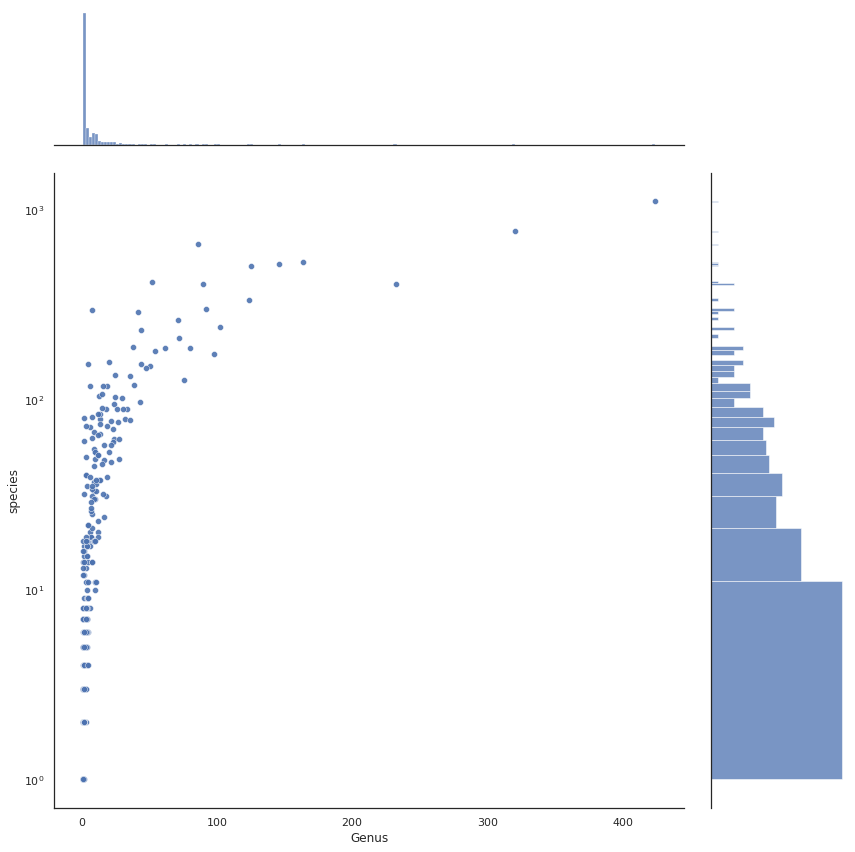

In [31]:
plt.figure(figsize=(25,10))


data = df.groupby("Family").nunique()

# fig, ax = plt.subplots(1,1, figsize=(20,10))
sns.jointplot(data=data, x="Genus", y="species", alpha=0.9, height=12, ratio=4, kind='scatter') #, legend=False, log_scale=True) #, kind='hist')#, figsize=(20,10))

ax = plt.gca()
ax.set_yscale("log")
ax.set_xscale("log")

In [20]:
dsets = [extant_df,
    general_df,
    florissant_df]

taxon_cols = ['Family', 'Genus', 'species', 'collection', 'catalog_number', 'Species']

for col in taxon_cols:
    for df in dsets:
        gb = df.groupby(col)
        
        gb.ngroups
        df.describe(include='all')
        break
    break
gb

354

,path,filename,Family,Genus,species,collection,catalog_number,Species
count,26176,26176,26176,26176,26176,26176,26176,26176
unique,26176,26176,354,4573,7807,4,26176,17389
top,/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v1_1/images/Extant_Leaves/original/full/jpg/Trochodendraceae/Trochodendraceae_Tetracentron_sinense_Wolfe_Wolfe_514.jpg,Trochodendraceae_Tetracentron_sinense_Wolfe_Wolfe_514,Fabaceae,Quercus,sp,Wolfe,Wolfe_514,Hymenaea courbaril
freq,1,1,2301,395,124,16249,1,42


In [34]:
styles = ['seaborn-dark',
    'seaborn-darkgrid',
    'seaborn-ticks',
    'fivethirtyeight',
    'seaborn-whitegrid',
    'classic',
    '_classic_test',
    'seaborn-talk',
    'seaborn-dark-palette',
    'seaborn-bright',
    'seaborn-pastel',
    'grayscale',
    'seaborn-notebook',
    'ggplot',
    'seaborn-colorblind',
    'seaborn-muted',
    'seaborn',
    'seaborn-paper',
    'bmh',
    'seaborn-white',
    'dark_background',
    'seaborn-poster',
    'seaborn-deep'
         ]

style = 'seaborn-notebook'
cmap = "Spectral" #"gist_stern_r"
plt.style.use(style)


# plt.figure(figsize=(25,10))
# def plot_groupby_hist(df: pd.DataFrame,
#                       )

# gb[["Genus", "species"]].nunique().hist(ax=plt.gca(), bins=100, alpha=0.8)

In [ ]:
def categorical_order(values, order=None):
    """Return a list of unique data values.

    Determine an ordered list of levels in ``values``.

    Parameters
    ----------
    values : list, array, Categorical, or Series
        Vector of "categorical" values
    order : list-like, optional
        Desired order of category levels to override the order determined
        from the ``values`` object.

    Returns
    -------
    order : list
        Ordered list of category levels

    """
    if order is None:
        if hasattr(values, "categories"):
            order = values.categories
        else:
            try:
                order = values.cat.categories
            except (TypeError, AttributeError):
                try:
                    order = values.unique()
                except AttributeError:
                    order = pd.unique(values)

    return list(order)


In [8]:
# # sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
# sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

# context = "paper"
# sns.set_context(context)
# style = "dark" # "darkgrid"
# sns.set_style(style)
# sns.set_palette(
#     sns.color_palette("mako")
# )

# y_col = "Family"
# barplot_kwargs = {
#     "edgecolor":"black",
#     "linewidth":1.0,
#     "width":0.9
#     # "width":0.8,
#     # "dodge":False,
#     # "saturation":0.5
# }

# """Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
# """

# styles = ['seaborn-dark',
#     'seaborn-darkgrid',
#     'seaborn-ticks',
#     'fivethirtyeight',
#     'seaborn-whitegrid',
#     'classic',
#     '_classic_test',
#     'seaborn-talk',
#     'seaborn-dark-palette',
#     'seaborn-bright',
#     'seaborn-pastel',
#     'grayscale',
#     'seaborn-notebook',
#     'ggplot',
#     'seaborn-colorblind',
#     'seaborn-muted',
#     'seaborn',
#     'seaborn-paper',
#     'bmh',
#     'seaborn-white',
#     'dark_background',
#     'seaborn-poster',
#     'seaborn-deep'
#          ]

# df = florissant_df
# df = general_df
# df = extant_df
# name="florissant"
# name="general"
# name="extant"

# style = styles[8]
# cmap = "Spectral" #"gist_stern_r"
# print(f"Using style: {style}, cmap: {cmap}")
# plt.style.use(style)

# num_samples = df.shape[0]
# data_df = (
#     pd.DataFrame(
#         {"count":df.value_counts(y_col),
#          "normalized_cumsum":df.value_counts(y_col).cumsum()/num_samples})
#     .reset_index(drop=False)
# )

# fig, ax = plot_class_counts(data_df,
#                             y_col=y_col,
#                             ax=None,
#                             figsize=(20,10),
#                             hue="normalized_cumsum",
#                             alpha=0.6,
#                             ticklabel_rotation=40,
#                             cmap=cmap,
#                             title=name + f" {y_col} Distribution",
#                             **barplot_kwargs)

# %time plt.savefig(f"{name}-test_image.png")
# %time plt.savefig(f"{name}-test_image.svg")

## Create plots

In [10]:
# %load_ext snakeviz
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

# sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})

# context = "paper"
# sns.set_context(context)
# style = "darkgrid"
# sns.set_style(style)
# sns.set_palette(
#     sns.color_palette("mako")
# )

# y_col = "Family"
# barplot_kwargs = {
#     # "width":0.8,
#     # "dodge":False,
#     # "saturation":0.5
# }

# plt.style.use('fivethirtyeight')

# df = data_df
# norm = plt.Normalize(df["count"].values.min(), df["count"].values.max())
# colors = plt.cm.copper_r(norm(df["count"])) 
# # barplot_kwargs.update({"palette":colors})
# colors

In [22]:
%load_ext snakeviz
sns.set(rc={"figure.dpi":200, 'savefig.dpi':300})

context = "paper"
sns.set_context(context)
style = "dark" # "darkgrid"
sns.set_style(style)
sns.set_palette(
    sns.color_palette("mako")
)

# y_col = "Family"
barplot_kwargs = {
    "edgecolor":"black",
    "linewidth":0.5,
    "width":0.9
    # "width":0.8,
    # "dodge":False,
    # "saturation":0.5
}

styles = ['seaborn-dark',
    'seaborn-darkgrid',
    'seaborn-ticks',
    'fivethirtyeight',
    'seaborn-whitegrid',
    'classic',
    '_classic_test',
    'seaborn-talk',
    'seaborn-dark-palette',
    'seaborn-bright',
    'seaborn-pastel',
    'grayscale',
    'seaborn-notebook',
    'ggplot',
    'seaborn-colorblind',
    'seaborn-muted',
    'seaborn',
    'seaborn-paper',
    'bmh',
    'seaborn-white',
    'dark_background',
    'seaborn-poster',
    'seaborn-deep'
         ]

style = styles[8]
cmap = "Spectral" #"gist_stern_r"
print(f"Using style: {style}, cmap: {cmap}")
plt.style.use(style)

Using style: seaborn-dark-palette, cmap: Spectral


Start: 2022-02-07 10:42:48.297245
End (barplot): Barplot only:  0:00:00.403809
 Total:  0:00:00.403809

End (lineplot): Lineplot only:  0:00:00.023015
 Total:  0:00:00.426829

Saved: /media/data/jacob/GitHub/image-utils/notebooks/plots/Extant Leaves-Family_Counts-x-CumSum.svg
Start: 2022-02-07 10:42:49.977584
End (barplot): Barplot only:  0:00:00.065121
 Total:  0:00:00.065121

End (lineplot): Lineplot only:  0:00:00.022920
 Total:  0:00:00.088045

Saved: /media/data/jacob/GitHub/image-utils/notebooks/plots/General Fossils-Family_Counts-x-CumSum.svg
Start: 2022-02-07 10:42:50.689738
End (barplot): Barplot only:  0:00:00.050049
 Total:  0:00:00.050049

End (lineplot): Lineplot only:  0:00:00.024707
 Total:  0:00:00.074760

Saved: /media/data/jacob/GitHub/image-utils/notebooks/plots/Florissant Fossils-Family_Counts-x-CumSum.svg


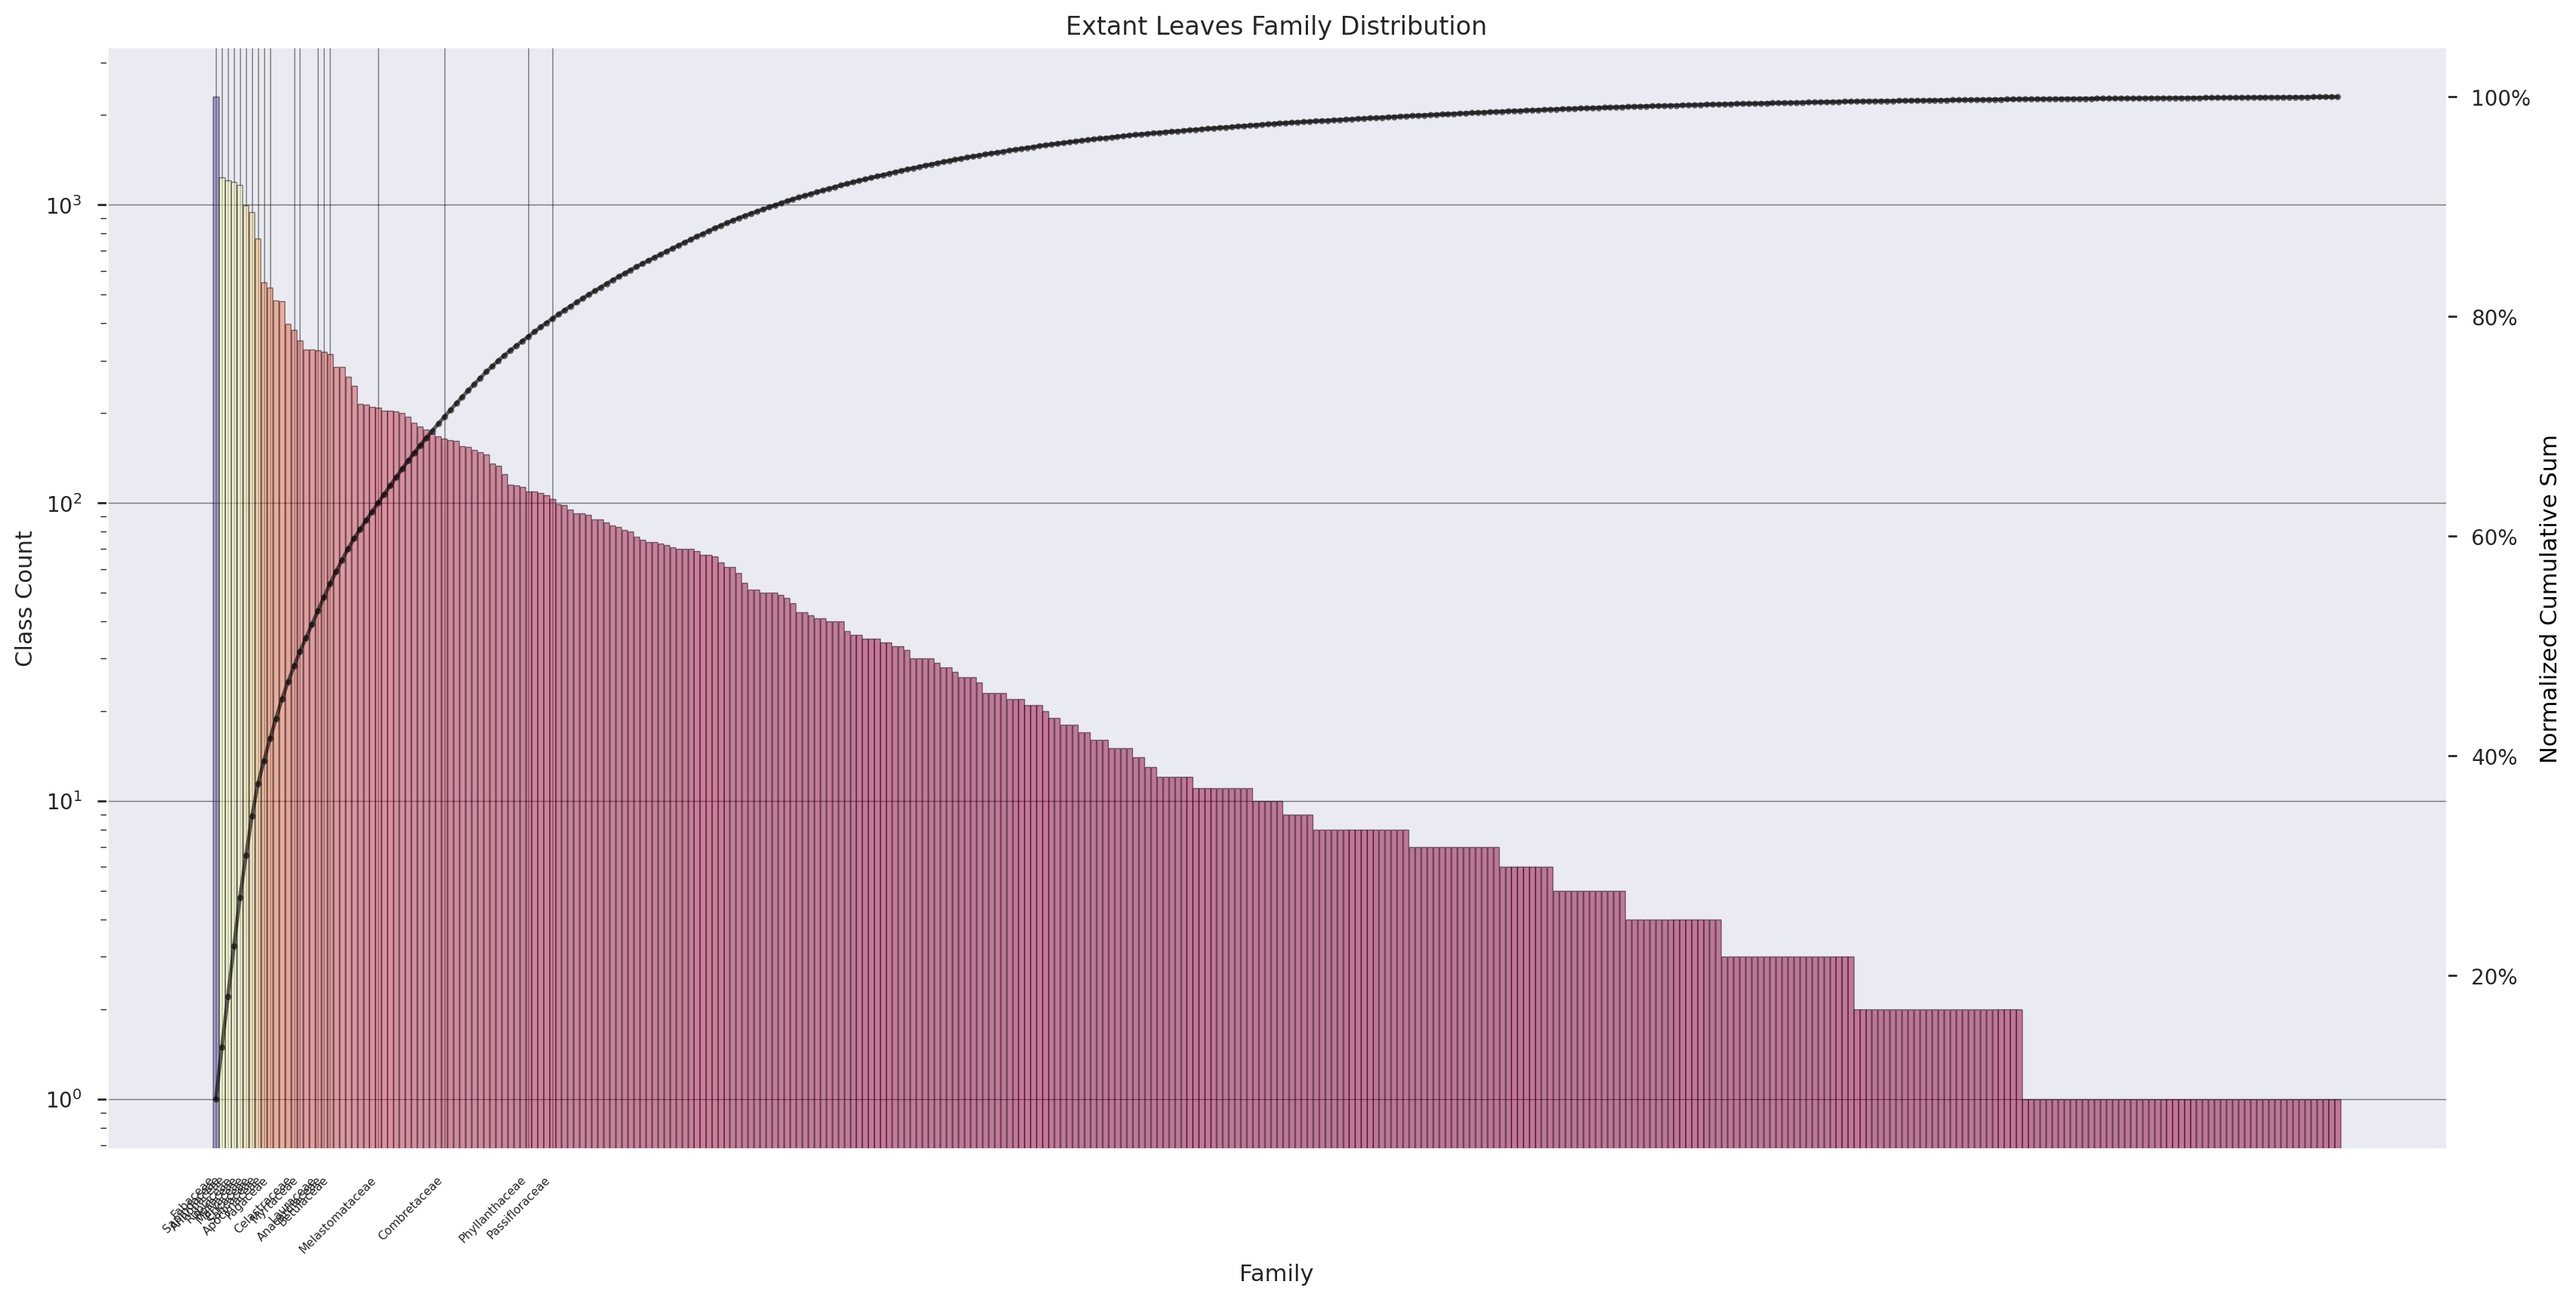

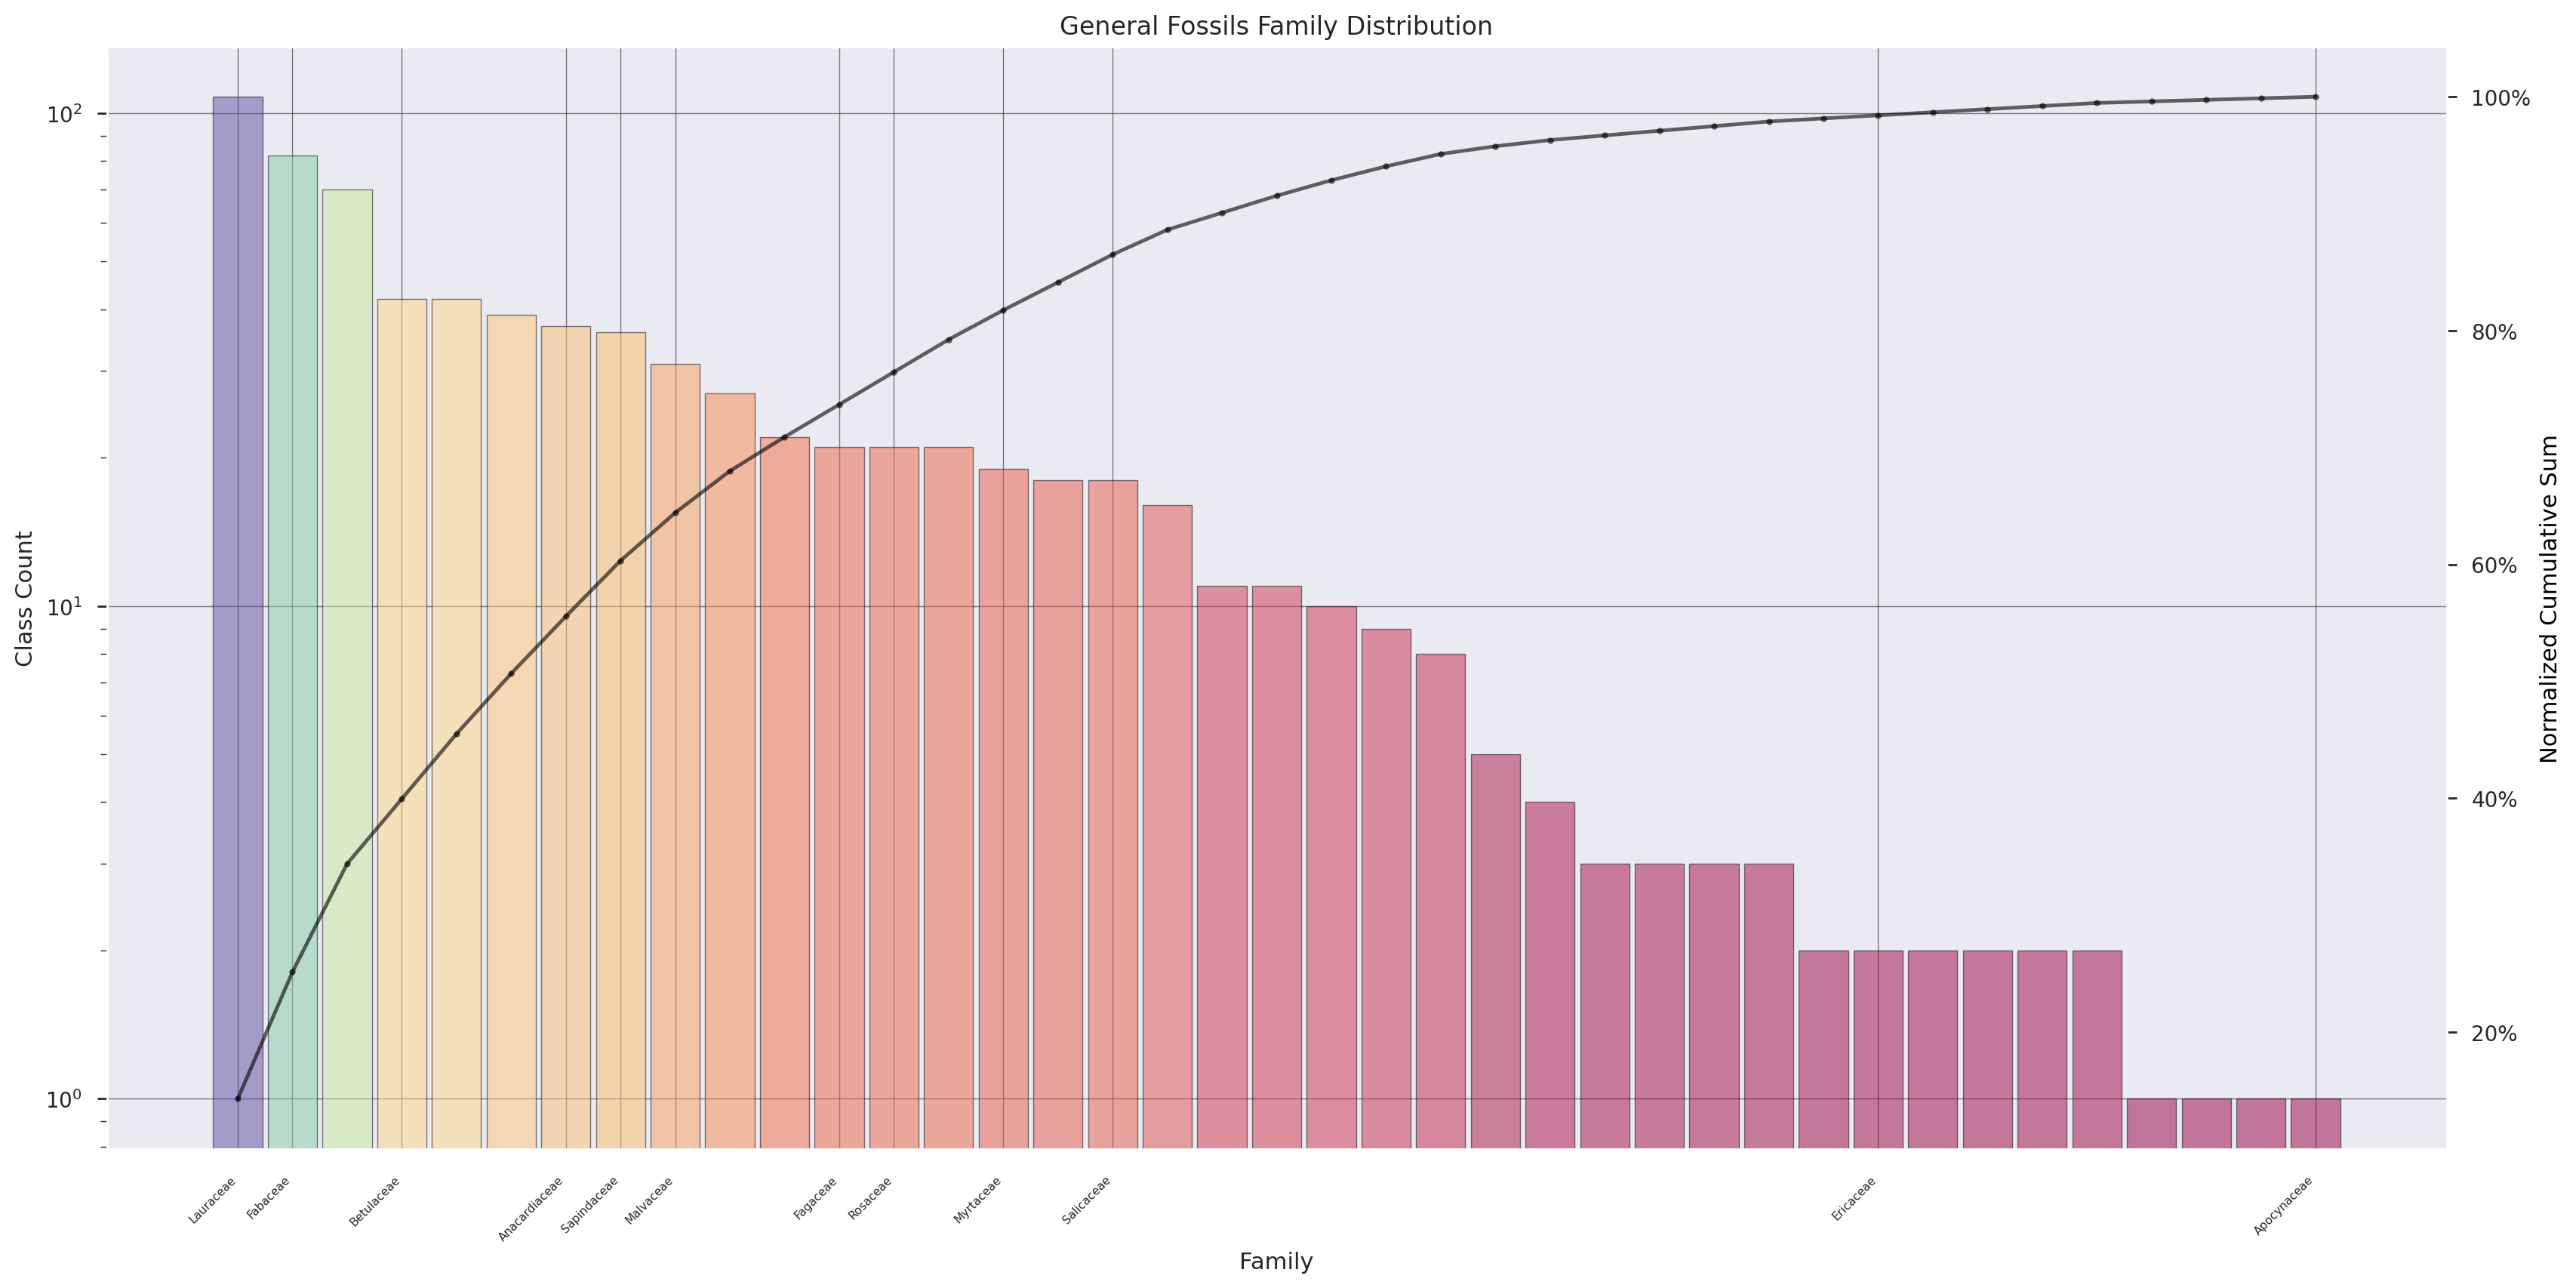

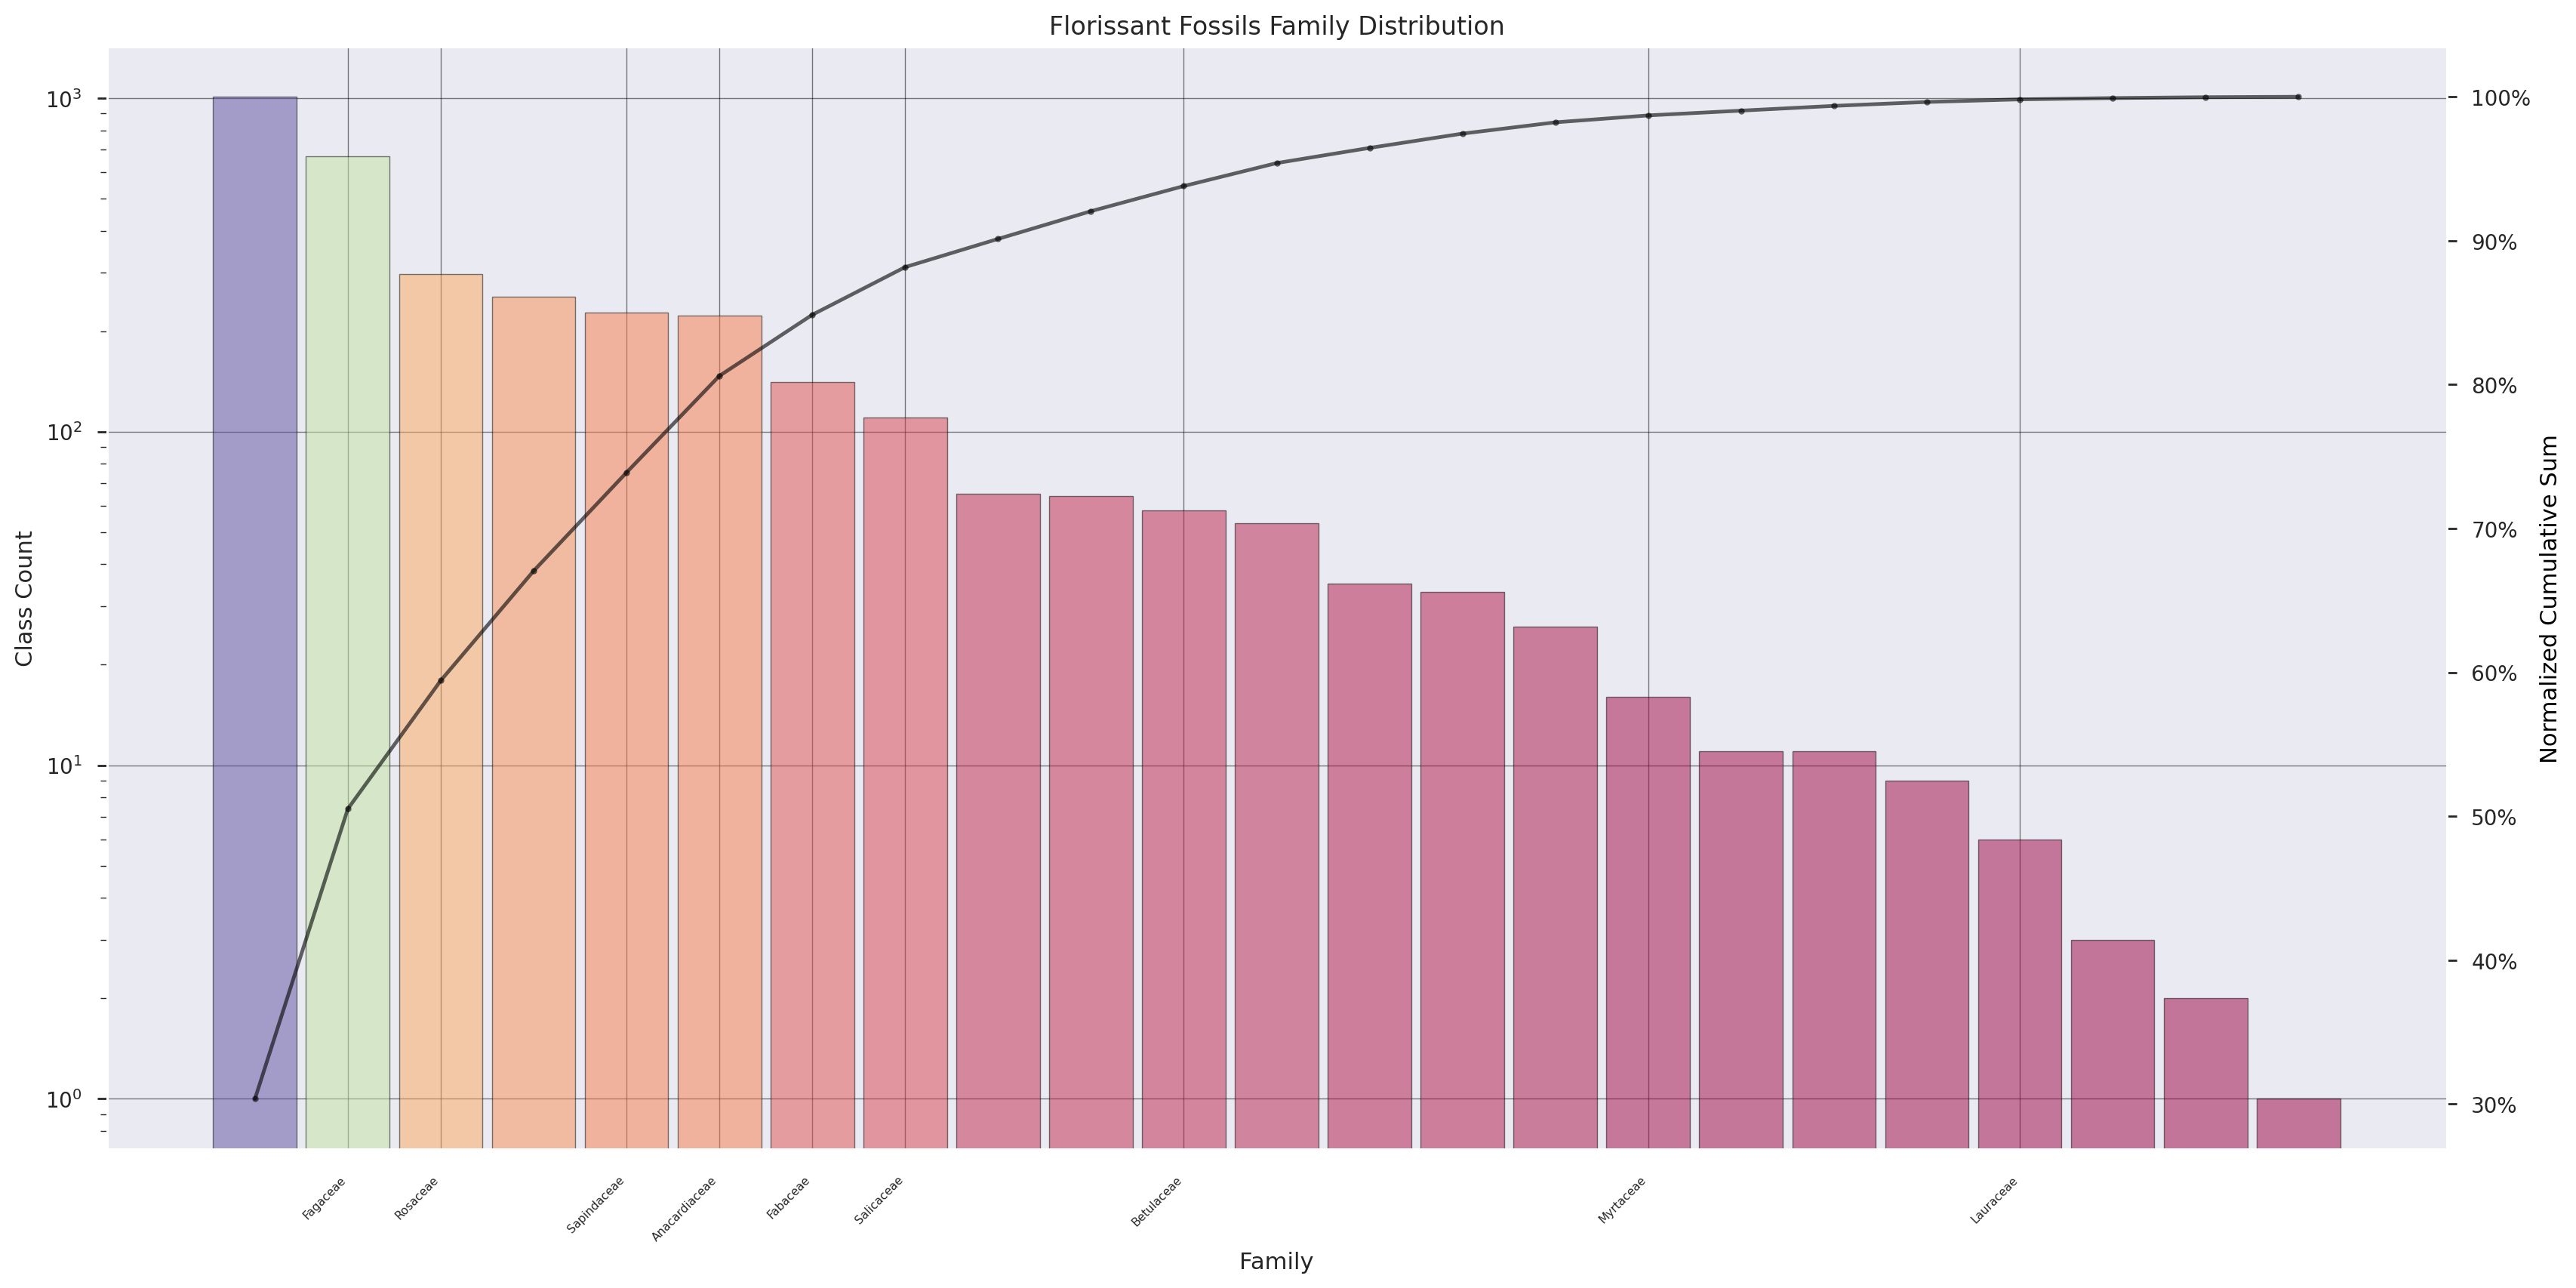

In [55]:
# %%snakeviz
lineplot_kwargs = {"markersize":3.0}

for y_col in ["Family"]: # , "Genus", "Species"]:
    for name, df in zip(
        ["Extant Leaves", "General Fossils", "Florissant Fossils"], # [::-1],
        [extant_df, general_df, florissant_df] # [::-1]
    ):
        
        # y_col="Species"
        # name="Extant Leaves"
        # df=extant_df
        
        num_samples = df.shape[0]
        data_df = (
            pd.DataFrame(
                {"count":df.value_counts(y_col),
                 "normalized_cumsum":df.value_counts(y_col).cumsum()/num_samples})
            .reset_index(drop=False)
        )
        
        xticks_df = data_df[data_df.Family.isin(PNAS_leaf_classes)]
        xticks, xtick_labels = list(xticks_df.index), list(xticks_df.Family)

        fig, ax = plot_class_counts(data_df,
                                    y_col=y_col,
                                    ax=None,
                                    figsize=(20,10),
                                    hue="normalized_cumsum",
                                    alpha=0.5,
                                    ticklabel_rotation=45,
                                    cmap=cmap,
                                    title=name + f" {y_col} Distribution",
                                    xticks=xticks,
                                    xtick_labels=xtick_labels,
                                    log_yaxis=True,
                                    lineplot_kwargs=lineplot_kwargs,
                                    **barplot_kwargs)
        
        
        fig.subplots_adjust(bottom=0.15)
        filepath = Path(OUTPUTS_DIR, name + f"-{y_col}_Counts-x-CumSum" + ".svg")
        plt.savefig(filepath) #, bbox_inches="tight")
        print(f"Saved: {filepath}")
        data_table_path = Path(OUTPUTS_DIR, name + f"-{y_col}_Counts-x-CumSum_table" + ".csv")
        data_df.to_csv(data_table_path)
        # break
    # break